<a href="https://colab.research.google.com/github/AfafAhmed/AnieAIProjects/blob/main/Machine_Learning_for_Predictive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

pd.pandas.set_option('display.max_columns',None)

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Telecom Data.csv to Telecom Data.csv


In [ ]:
import io
telecom_cust = pd.read_csv(io.BytesIO(uploaded['Telecom Data.csv']))
telecom_cust.head(5)

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [ ]:
telecom_cust.shape
telecom_cust.dtypes

(51047, 58)

CustomerID                     int64
Churn                         object
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
ServiceArea                   object
H

In [ ]:
telecom_cust['HandsetPrice']= telecom_cust['HandsetPrice'].replace("Unknown",None)
telecom_cust.head()
telecom_cust['HandsetPrice']=pd.to_numeric(telecom_cust['HandsetPrice'])

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,30,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [ ]:
telecom_cust.dtypes

CustomerID                     int64
Churn                         object
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
ServiceArea                   object
H

In [ ]:
## printing the percentage of missing values
features_na = [features for features in telecom_cust.columns if telecom_cust[features].isnull().sum() > 0]
for feature in features_na:
   print(feature, np.round(telecom_cust[feature].isnull().mean(),4),"% missing value")

MonthlyRevenue 0.0031 % missing value
MonthlyMinutes 0.0031 % missing value
TotalRecurringCharge 0.0031 % missing value
DirectorAssistedCalls 0.0031 % missing value
OverageMinutes 0.0031 % missing value
RoamingCalls 0.0031 % missing value
PercChangeMinutes 0.0072 % missing value
PercChangeRevenues 0.0072 % missing value
ServiceArea 0.0005 % missing value
Handsets 0.0 % missing value
HandsetModels 0.0 % missing value
CurrentEquipmentDays 0.0 % missing value
AgeHH1 0.0178 % missing value
AgeHH2 0.0178 % missing value


In [ ]:
## Numeric Variable
numeric_feature = [feature for feature in telecom_cust.columns if telecom_cust[feature].dtype != 'O']
print("Number of Numeric Features", len(numeric_feature))
telecom_cust[numeric_feature].head()

Number of Numeric Features 36


,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice
0,3000002,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,2.0,2.0,361.0,62.0,0.0,1,0,0,4,0,30
1,3000010,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,2.0,1.0,1504.0,40.0,42.0,0,0,0,5,0,30
2,3000014,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,1.0,1.0,1812.0,26.0,26.0,0,0,0,6,0,30
3,3000022,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,9.0,4.0,458.0,30.0,0.0,0,0,0,6,0,10
4,3000026,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,4.0,3.0,852.0,46.0,54.0,0,0,0,9,1,10


In [ ]:
## Discreate variable
telecom_cust['Churn1']= np.where((telecom_cust['Churn']== "Yes"),1,0)
discrete_feature = [feature for feature in numeric_feature if len(telecom_cust[feature].unique())<25 and feature not in ['CustomerID']+['Churn1'] ]
for feature in discrete_feature:
  print("{} , {}".format(feature,len(telecom_cust[feature].unique())))
print("Discrete variable count : {}" .format(len(discrete_feature)))

UniqueSubs , 15
ActiveSubs , 12
Handsets , 24
HandsetModels , 14
RetentionCalls , 5
RetentionOffersAccepted , 4
ReferralsMadeBySubscriber , 13
IncomeGroup , 10
AdjustmentsToCreditRating , 15
HandsetPrice , 15
Discrete variable count : 10


Text(0.5, 0, 'UniqueSubs')

Text(0, 0.5, 'Churn')

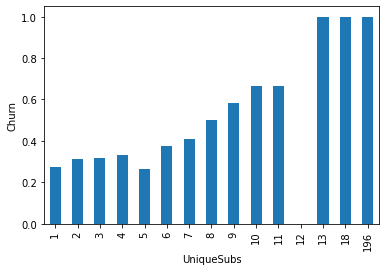

Text(0.5, 0, 'ActiveSubs')

Text(0, 0.5, 'Churn')

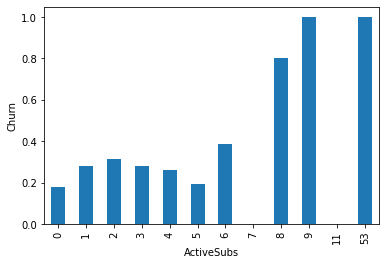

Text(0.5, 0, 'Handsets')

Text(0, 0.5, 'Churn')

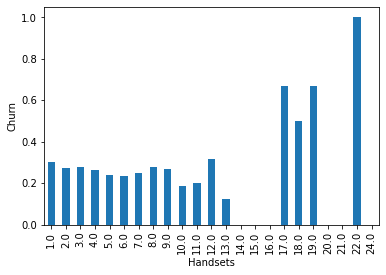

Text(0.5, 0, 'HandsetModels')

Text(0, 0.5, 'Churn')

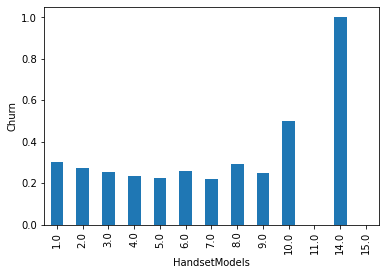

Text(0.5, 0, 'RetentionCalls')

Text(0, 0.5, 'Churn')

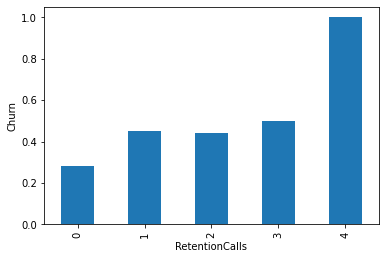

Text(0.5, 0, 'RetentionOffersAccepted')

Text(0, 0.5, 'Churn')

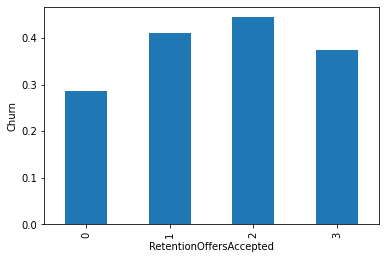

Text(0.5, 0, 'ReferralsMadeBySubscriber')

Text(0, 0.5, 'Churn')

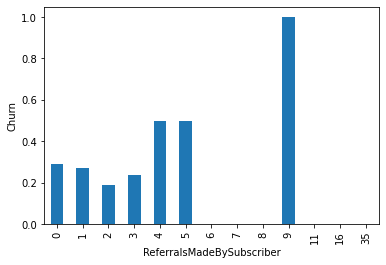

Text(0.5, 0, 'IncomeGroup')

Text(0, 0.5, 'Churn')

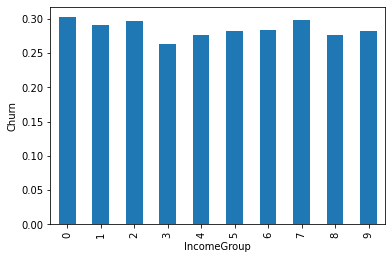

Text(0.5, 0, 'AdjustmentsToCreditRating')

Text(0, 0.5, 'Churn')

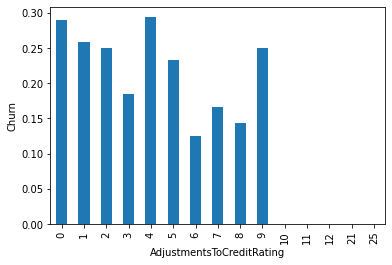

Text(0.5, 0, 'HandsetPrice')

Text(0, 0.5, 'Churn')

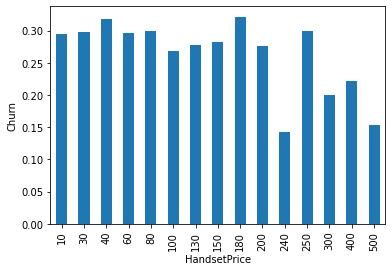

In [ ]:
## Relation b/w discrete feature and Churn
for feature in discrete_feature:
  data=telecom_cust.copy()
  data.groupby(feature)['Churn1'].mean().plot.bar()
  plt.xlabel(feature)
  plt.ylabel("Churn")
  plt.show()

In [ ]:
## Continous variable
continous_feature = [feature for feature in numeric_feature if feature not in discrete_feature+['CustomerID']+['Churn1'] ]
print("Continous variable count : {}" .format(len(continous_feature)))

Continous variable count : 25


Text(0.5, 0, 'MonthlyRevenue')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'MonthlyRevenue')

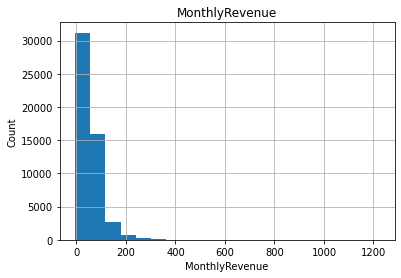

Text(0.5, 0, 'MonthlyMinutes')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'MonthlyMinutes')

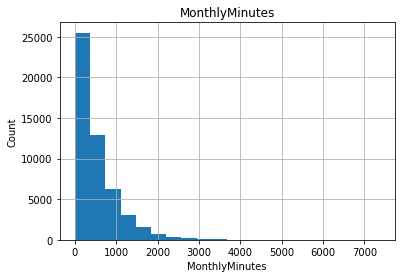

Text(0.5, 0, 'TotalRecurringCharge')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'TotalRecurringCharge')

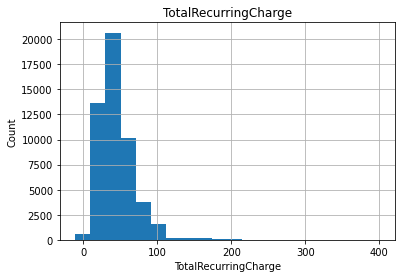

Text(0.5, 0, 'DirectorAssistedCalls')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'DirectorAssistedCalls')

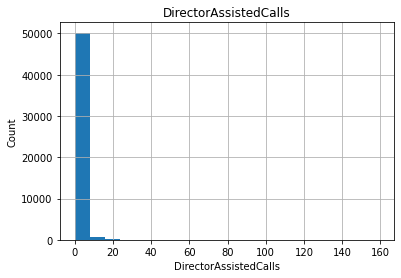

Text(0.5, 0, 'OverageMinutes')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'OverageMinutes')

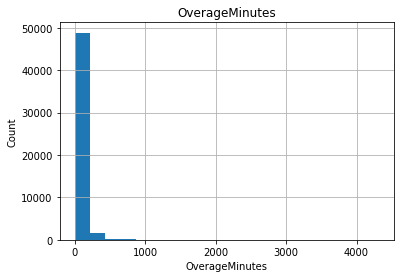

Text(0.5, 0, 'RoamingCalls')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'RoamingCalls')

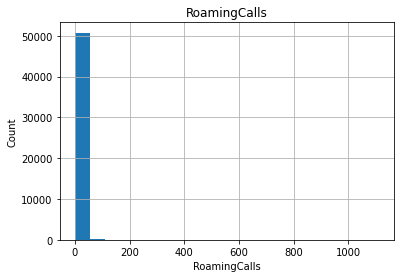

Text(0.5, 0, 'PercChangeMinutes')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'PercChangeMinutes')

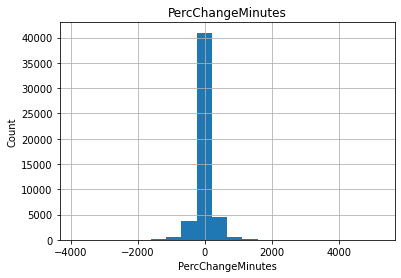

Text(0.5, 0, 'PercChangeRevenues')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'PercChangeRevenues')

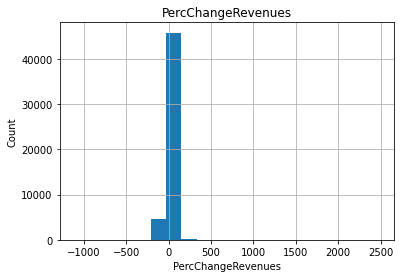

Text(0.5, 0, 'DroppedCalls')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'DroppedCalls')

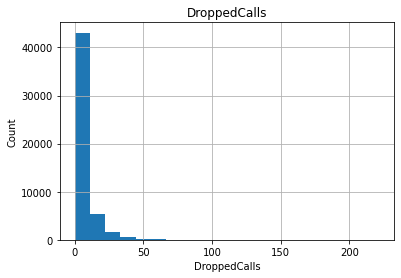

Text(0.5, 0, 'BlockedCalls')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'BlockedCalls')

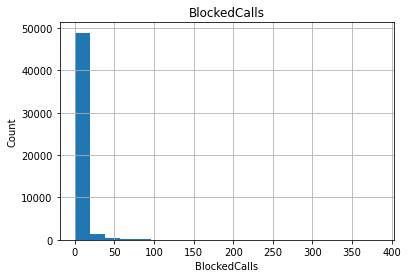

Text(0.5, 0, 'UnansweredCalls')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'UnansweredCalls')

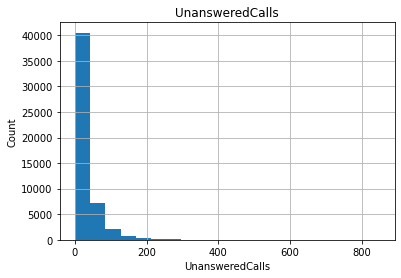

Text(0.5, 0, 'CustomerCareCalls')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'CustomerCareCalls')

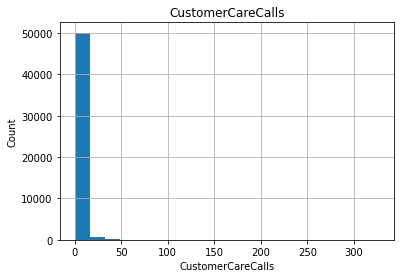

Text(0.5, 0, 'ThreewayCalls')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'ThreewayCalls')

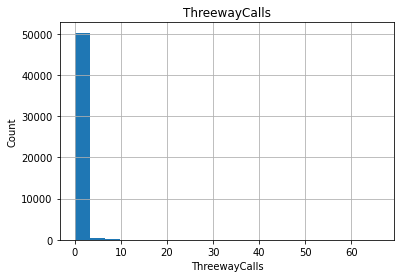

Text(0.5, 0, 'ReceivedCalls')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'ReceivedCalls')

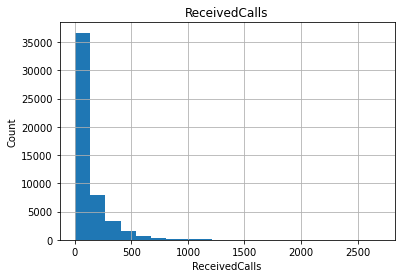

Text(0.5, 0, 'OutboundCalls')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'OutboundCalls')

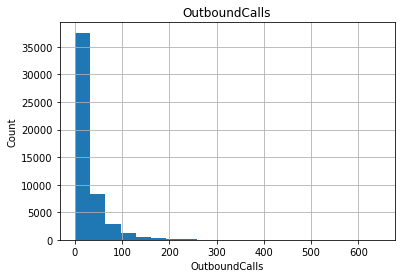

Text(0.5, 0, 'InboundCalls')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'InboundCalls')

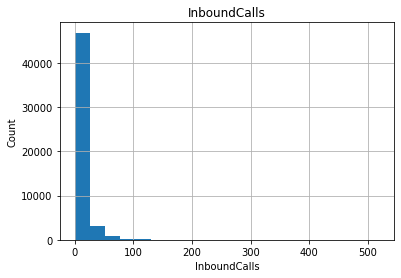

Text(0.5, 0, 'PeakCallsInOut')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'PeakCallsInOut')

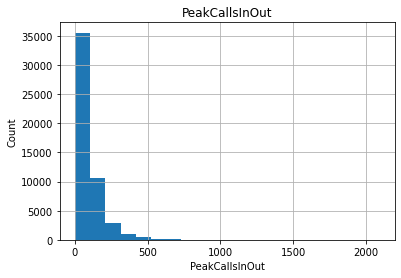

Text(0.5, 0, 'OffPeakCallsInOut')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'OffPeakCallsInOut')

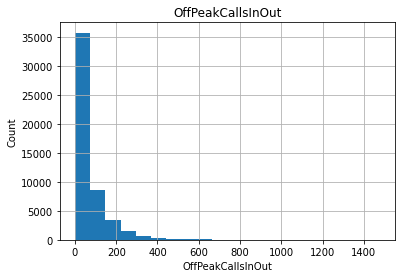

Text(0.5, 0, 'DroppedBlockedCalls')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'DroppedBlockedCalls')

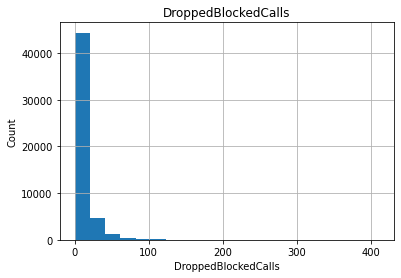

Text(0.5, 0, 'CallForwardingCalls')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'CallForwardingCalls')

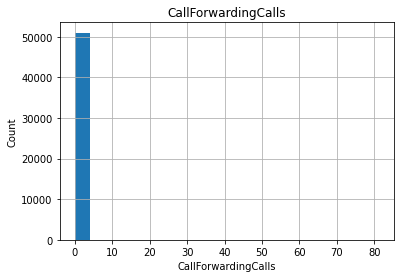

Text(0.5, 0, 'CallWaitingCalls')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'CallWaitingCalls')

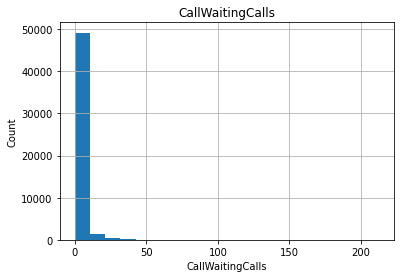

Text(0.5, 0, 'MonthsInService')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'MonthsInService')

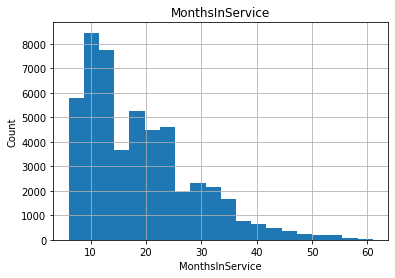

Text(0.5, 0, 'CurrentEquipmentDays')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'CurrentEquipmentDays')

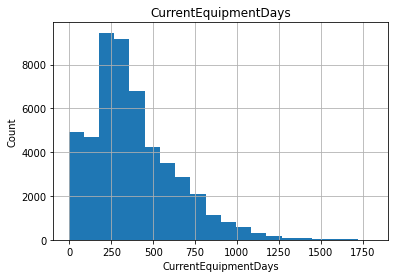

Text(0.5, 0, 'AgeHH1')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'AgeHH1')

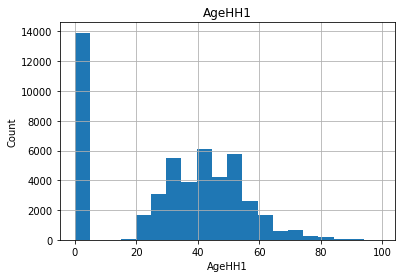

Text(0.5, 0, 'AgeHH2')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'AgeHH2')

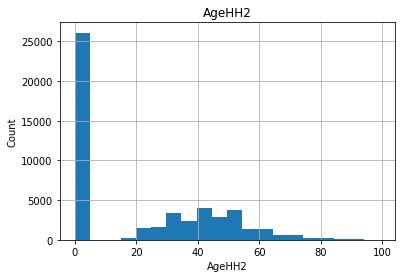

In [ ]:
## Finding the distribution of continous feature
for feature in continous_feature:
  data=telecom_cust.copy()
  data[feature].hist(bins=20)
  plt.xlabel(feature)
  plt.ylabel("Count")
  plt.title(feature)
  plt.show()

Text(0.5, 0, 'Churn')

Text(0, 0.5, 'Churn')

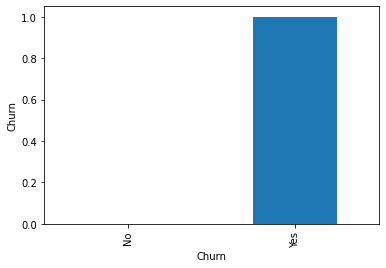

Text(0.5, 0, 'ServiceArea')

Text(0, 0.5, 'Churn')

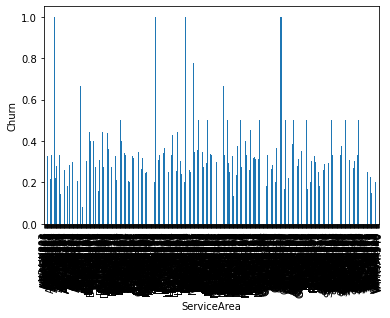

Text(0.5, 0, 'ChildrenInHH')

Text(0, 0.5, 'Churn')

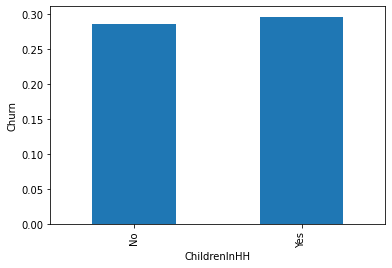

Text(0.5, 0, 'HandsetRefurbished')

Text(0, 0.5, 'Churn')

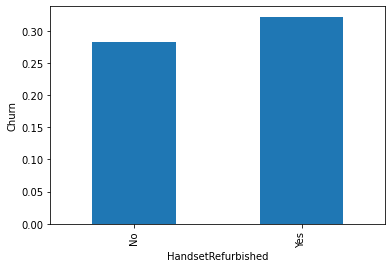

Text(0.5, 0, 'HandsetWebCapable')

Text(0, 0.5, 'Churn')

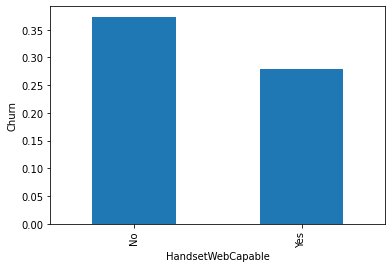

Text(0.5, 0, 'TruckOwner')

Text(0, 0.5, 'Churn')

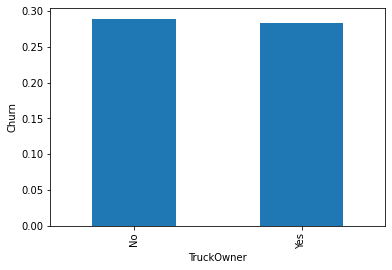

Text(0.5, 0, 'RVOwner')

Text(0, 0.5, 'Churn')

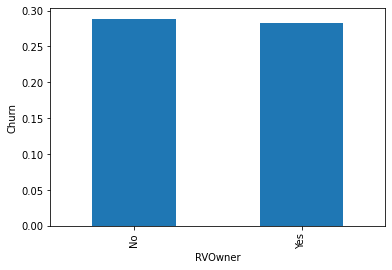

Text(0.5, 0, 'Homeownership')

Text(0, 0.5, 'Churn')

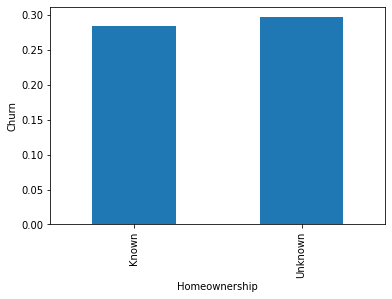

Text(0.5, 0, 'BuysViaMailOrder')

Text(0, 0.5, 'Churn')

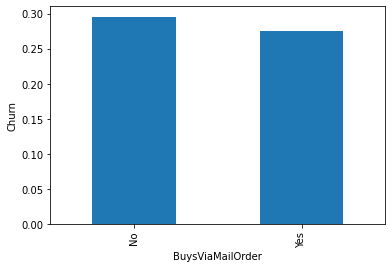

Text(0.5, 0, 'RespondsToMailOffers')

Text(0, 0.5, 'Churn')

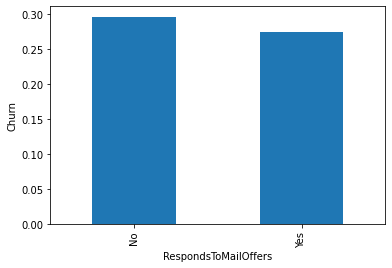

Text(0.5, 0, 'OptOutMailings')

Text(0, 0.5, 'Churn')

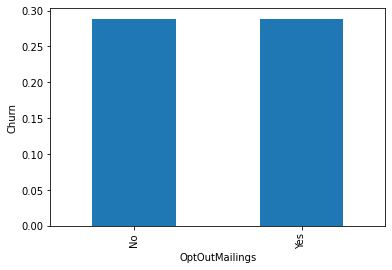

Text(0.5, 0, 'NonUSTravel')

Text(0, 0.5, 'Churn')

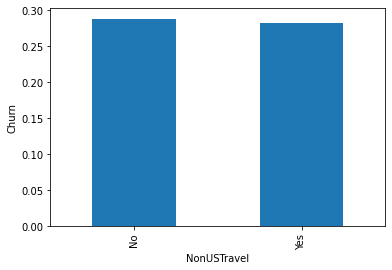

Text(0.5, 0, 'OwnsComputer')

Text(0, 0.5, 'Churn')

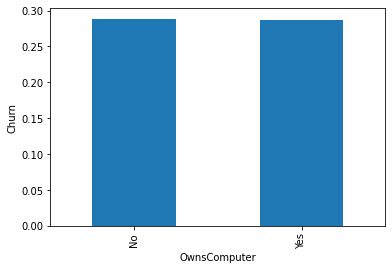

Text(0.5, 0, 'HasCreditCard')

Text(0, 0.5, 'Churn')

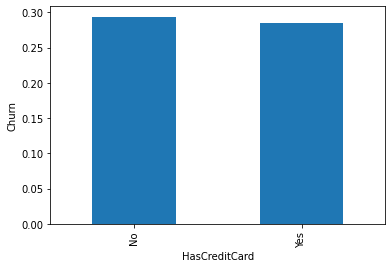

Text(0.5, 0, 'NewCellphoneUser')

Text(0, 0.5, 'Churn')

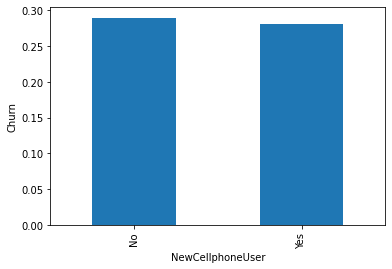

Text(0.5, 0, 'NotNewCellphoneUser')

Text(0, 0.5, 'Churn')

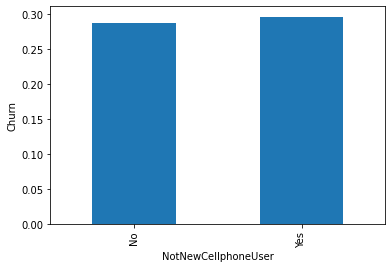

Text(0.5, 0, 'OwnsMotorcycle')

Text(0, 0.5, 'Churn')

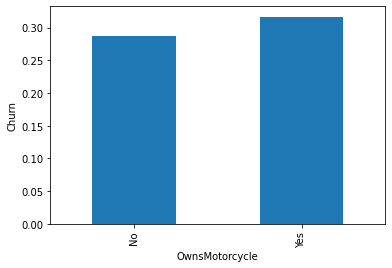

Text(0.5, 0, 'MadeCallToRetentionTeam')

Text(0, 0.5, 'Churn')

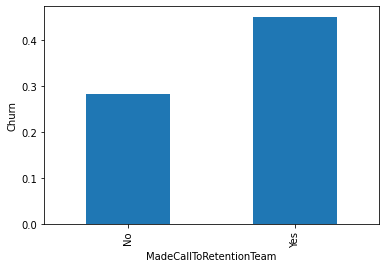

Text(0.5, 0, 'CreditRating')

Text(0, 0.5, 'Churn')

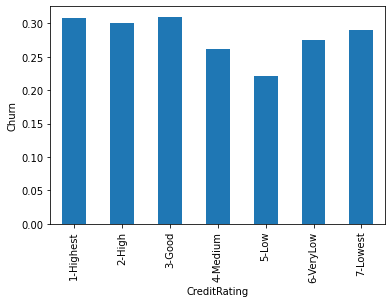

Text(0.5, 0, 'PrizmCode')

Text(0, 0.5, 'Churn')

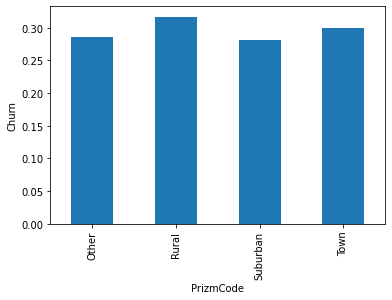

Text(0.5, 0, 'Occupation')

Text(0, 0.5, 'Churn')

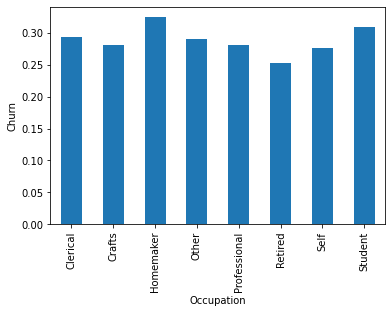

Text(0.5, 0, 'MaritalStatus')

Text(0, 0.5, 'Churn')

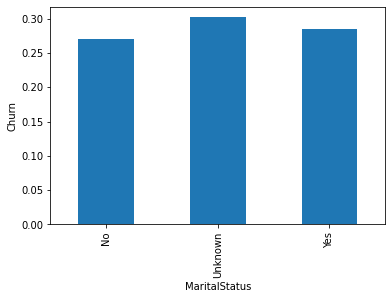

In [ ]:
## Categorical Features

categorical_feature = [feature for feature in telecom_cust.columns if telecom_cust[feature].dtype == 'O']
for feature in categorical_feature:
  data=telecom_cust.copy()
  data.groupby(feature)['Churn1'].mean().plot.bar()
  plt.xlabel(feature)
  plt.ylabel("Churn")
  plt.show()


#Feature Engineering

### Handling Missing Values (Categorical features)

In [ ]:
data = telecom_cust.copy()
data.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Churn1
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No,1
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes,1
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,30,No,3-Good,Town,Crafts,Yes,0
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No,0
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes,1


In [ ]:
data = data.drop(['Churn','CustomerID'],axis=1)
data.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Churn1
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No,1
1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes,1
2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,30,No,3-Good,Town,Crafts,Yes,0
3,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No,0
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes,1


In [ ]:
categorical_feature = [feature for feature in data.columns if data[feature].dtype == 'O']
features_na = [feature for feature in data.columns if data[feature].isnull().sum() > 0 and data[feature].dtype == 'O']
features_na
for feature in features_na:
  print("{} {} % missing value" .format(feature,np.round(data[feature].isnull().mean(),4)))

['ServiceArea']

ServiceArea 0.0005 % missing value


In [ ]:
## filling missing values of featyre "Service area" 
data['ServiceArea']=data['ServiceArea'].fillna('Missing')
data['ServiceArea'].isnull().sum()


0

###Handling Missing Values(Numeric Variable)

In [ ]:
numeric_na = [feature for feature in data.columns if data[feature].isnull().sum() > 0 and data[feature].dtype != 'O']
numeric_na
for feature in numeric_na:
  print("{} {} % missing value" .format(feature,np.round(data[feature].isnull().mean(),4)))

['MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'Handsets',
 'HandsetModels',
 'CurrentEquipmentDays',
 'AgeHH1',
 'AgeHH2']

MonthlyRevenue 0.0031 % missing value
MonthlyMinutes 0.0031 % missing value
TotalRecurringCharge 0.0031 % missing value
DirectorAssistedCalls 0.0031 % missing value
OverageMinutes 0.0031 % missing value
RoamingCalls 0.0031 % missing value
PercChangeMinutes 0.0072 % missing value
PercChangeRevenues 0.0072 % missing value
Handsets 0.0 % missing value
HandsetModels 0.0 % missing value
CurrentEquipmentDays 0.0 % missing value
AgeHH1 0.0178 % missing value
AgeHH2 0.0178 % missing value


In [ ]:
## Replacing numeric missing values
for feature in numeric_na:
  median_value = data[feature].median()
  data[feature+'nan']=np.where(data[feature].isnull(),1,0)
  data[feature].fillna(median_value,inplace=True)
for feature in numeric_na:
 print(feature,data[feature].isnull().sum())  

MonthlyRevenue 0
MonthlyMinutes 0
TotalRecurringCharge 0
DirectorAssistedCalls 0
OverageMinutes 0
RoamingCalls 0
PercChangeMinutes 0
PercChangeRevenues 0
Handsets 0
HandsetModels 0
CurrentEquipmentDays 0
AgeHH1 0
AgeHH2 0


###Handling Rare Categorical Feature

In [ ]:
for feature in categorical_feature:
  temp = data.groupby(feature)['Churn1'].count()/len(data)
  temp_df = temp[temp>0.001].index
  data[feature]=np.where(data[feature].isin(temp_df),data[feature],'Rare_var')

###Handling Numeric Feature

In [ ]:
data.head(10)

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Churn1,MonthlyRevenuenan,MonthlyMinutesnan,TotalRecurringChargenan,DirectorAssistedCallsnan,OverageMinutesnan,RoamingCallsnan,PercChangeMinutesnan,PercChangeRevenuesnan,Handsetsnan,HandsetModelsnan,CurrentEquipmentDaysnan,AgeHH1nan,AgeHH2nan
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,30,No,3-Good,Town,Crafts,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,38.05,682.0,52.0,0.25,0.0,0.0,148.0,-3.1,9.0,1.7,13.0,0.7,0.0,42.2,6.7,0.0,33.3,53.0,10.7,0.0,0.7,53,1,1,OKCTUL918,3.0,2.0,231.0,28.0,0.0,No,No,Yes,No,No,Known,No,No,No,Yes,No,Yes,0,0,Yes,No,0,1,No,1,30,No,3-Good,Other,Other,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,31.66,26.0,30.0,0.25,0.0,0.0,60.0,4.0,0.0,1.0,2.3,0.0,0.0,0.0,0.0,0.0,1.7,1.7,1.0,0.0,0.0,57,2,2,OKCTUL918,2.0,2.0,601.0,52.0,58.0,No,No,Yes,No,No,Known,Yes,Yes,No,Yes,No,Yes,0,0,No,Yes,0,9,No,1,30,No,1-Highest,Other,Self,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,62.13,98.0,66.0,2.48,0.0,0.0,24.0,6.8,0.0,0.3,4.0,4.0,0.0,0.0,3.7,0.0,7.7,7.3,0.3,0.0,0.0,59,2,2,OKCOKC405,3.0,3.0,464.0,46.0,46.0,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,30,No,1-Highest,Other,Professional,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,35.30,24.0,35.0,0.00,0.0,0.0,20.0,-0.3,0.0,0.0,1.0,0.0,0.0,2.4,4.0,1.7,9.3,1.7,0.0,0.0,0.0,53,3,3,SANMCA210,4.0,3.0,544.0,36.0,34.0,Yes,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,Yes,No,0,9,No,0,80,No,1-Highest,Other,Other,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,81.00,1056.0,75.0,0.00,0.0,0.0,43.0,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,1,1,PITHOM412,9.0,5.0,388.0,46.0,68.0,No,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,Yes,No,0,5,No,1,30,No,3-Good,Other,Professional,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
numeric_feature1 = [feature for feature in data.columns if data[feature].dtype != 'O']
discrete_feature = [feature for feature in numeric_feature1 if len(data[feature].unique())<25 ]
continous_feature1 = [feature for feature in numeric_feature1 if feature not in discrete_feature ]
continous_feature1

['MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'DroppedCalls',
 'BlockedCalls',
 'UnansweredCalls',
 'CustomerCareCalls',
 'ThreewayCalls',
 'ReceivedCalls',
 'OutboundCalls',
 'InboundCalls',
 'PeakCallsInOut',
 'OffPeakCallsInOut',
 'DroppedBlockedCalls',
 'CallForwardingCalls',
 'CallWaitingCalls',
 'MonthsInService',
 'CurrentEquipmentDays',
 'AgeHH1',
 'AgeHH2']

### Handling Categorical Feature

In [ ]:
categorical_feature


['ServiceArea',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'OwnsMotorcycle',
 'MadeCallToRetentionTeam',
 'CreditRating',
 'PrizmCode',
 'Occupation',
 'MaritalStatus']

In [ ]:
telecom_cust['ServiceArea']=telecom_cust['ServiceArea'].fillna('Missing')
data['Churn2']=telecom_cust['Churn1']
data.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Churn1,MonthlyRevenuenan,MonthlyMinutesnan,TotalRecurringChargenan,DirectorAssistedCallsnan,OverageMinutesnan,RoamingCallsnan,PercChangeMinutesnan,PercChangeRevenuesnan,Handsetsnan,HandsetModelsnan,CurrentEquipmentDaysnan,AgeHH1nan,AgeHH2nan,Churn2
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,30,No,3-Good,Town,Crafts,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
for feature in categorical_feature:
 mean_ordinal=data.groupby(feature)['Churn1'].mean().to_dict()
 data['mean_ordinal_'+feature]=data[feature].map(mean_ordinal)

In [ ]:
data.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Churn1,MonthlyRevenuenan,MonthlyMinutesnan,TotalRecurringChargenan,DirectorAssistedCallsnan,OverageMinutesnan,RoamingCallsnan,PercChangeMinutesnan,PercChangeRevenuesnan,Handsetsnan,HandsetModelsnan,CurrentEquipmentDaysnan,AgeHH1nan,AgeHH2nan,Churn2,mean_ordinal_ServiceArea,mean_ordinal_ChildrenInHH,mean_ordinal_HandsetRefurbished,mean_ordinal_HandsetWebCapable,mean_ordinal_TruckOwner,mean_ordinal_RVOwner,mean_ordinal_Homeownership,mean_ordinal_BuysViaMailOrder,mean_ordinal_RespondsToMailOffers,mean_ordinal_OptOutMailings,mean_ordinal_NonUSTravel,mean_ordinal_OwnsComputer,mean_ordinal_HasCreditCard,mean_ordinal_NewCellphoneUser,mean_ordinal_NotNewCellphoneUser,mean_ordinal_OwnsMotorcycle,mean_ordinal_MadeCallToRetentionTeam,mean_ordinal_CreditRating,mean_ordinal_PrizmCode,mean_ordinal_Occupation,mean_ordinal_MaritalStatus
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.371257,0.285736,0.282737,0.278917,0.28923,0.288651,0.283962,0.275107,0.274836,0.28818,0.288511,0.286243,0.285482,0.289887,0.286967,0.287802,0.450430,0.308378,0.281414,0.281782,0.27103
1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.288889,0.295844,0.282737,0.373525,0.28923,0.288651,0.283962,0.275107,0.274836,0.28818,0.288511,0.286243,0.285482,0.281046,0.286967,0.287802,0.282443,0.261154,0.281414,0.281782,0.28540
2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,30,No,3-Good,Town,Crafts,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.229692,0.295844,0.282737,0.373525,0.28923,0.288651,0.296600,0.295588,0.296251,0.28818,0.288511,0.288628,0.285482,0.281046,0.286967,0.287802,0.282443,0.310107,0.299908,0.280448,0.28540
3,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.288889,0.285736,0.282737,0.278917,0.28923,0.288651,0.283962,0.275107,0.274836,0.28818,0.288511,0.288628,0.285482,0.281046,0.286967,0.287802,0.282443,0.261154,0.286230,0.290459,0.27103
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.241379,0.285736,0.282737,0.373525,0.28923,0.288651,0.283962,0.275107,0.274836,0.28818,0.288511,0.286243,0.285482,0.289887,0.295807,0.287802,0.282443,0.308378,0.286230,0.281782,0.28540


In [ ]:
data1=data.copy()

In [ ]:
data = data.drop(['ServiceArea',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'OwnsMotorcycle',
 'MadeCallToRetentionTeam',
 'CreditRating',
 'PrizmCode',
 'Occupation',
 'MaritalStatus'],axis=1)

In [ ]:
data2 = data.copy()

#Scaling and Standardization

In [ ]:
feature_scale = [feature for feature in data.columns if feature not in ['Churn1','Churn2']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
data3 = pd.concat([data[['Churn1']].reset_index(drop=True),pd.DataFrame(scaler.transform(data[feature_scale]),columns=feature_scale)],axis=1)

In [ ]:
data3.head()

,Churn1,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice,MonthlyRevenuenan,MonthlyMinutesnan,TotalRecurringChargenan,DirectorAssistedCallsnan,OverageMinutesnan,RoamingCallsnan,PercChangeMinutesnan,PercChangeRevenuesnan,Handsetsnan,HandsetModelsnan,CurrentEquipmentDaysnan,AgeHH1nan,AgeHH2nan,mean_ordinal_ServiceArea,mean_ordinal_ChildrenInHH,mean_ordinal_HandsetRefurbished,mean_ordinal_HandsetWebCapable,mean_ordinal_TruckOwner,mean_ordinal_RVOwner,mean_ordinal_Homeownership,mean_ordinal_BuysViaMailOrder,mean_ordinal_RespondsToMailOffers,mean_ordinal_OptOutMailings,mean_ordinal_NonUSTravel,mean_ordinal_OwnsComputer,mean_ordinal_HasCreditCard,mean_ordinal_NewCellphoneUser,mean_ordinal_NotNewCellphoneUser,mean_ordinal_OwnsMotorcycle,mean_ordinal_MadeCallToRetentionTeam,mean_ordinal_CreditRating,mean_ordinal_PrizmCode,mean_ordinal_Occupation,mean_ordinal_MaritalStatus
0,1,0.024537,0.029759,0.080292,0.001568,0.0,0.0,0.410058,0.303158,0.003157,0.001821,0.007423,0.000000,0.000000,0.036102,0.000000,0.000000,0.027742,0.016274,0.003158,0.0,0.001410,1.000000,0.005128,0.018868,0.043478,0.071429,0.201431,0.626263,0.000000,0.25,0.0,0.0,0.444444,0.00,0.040816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.724925,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.980609,0.000000,0.405701,0.000000
1,1,0.018836,0.001359,0.068127,0.000000,0.0,0.0,0.426933,0.308448,0.001353,0.000000,0.003181,0.000000,0.000000,0.000000,0.000000,0.000000,0.002392,0.000678,0.000729,0.0,0.000000,0.945455,0.000000,0.018868,0.043478,0.000000,0.830490,0.404040,0.424242,0.00,0.0,0.0,0.555556,0.00,0.040816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.473958,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.450887,0.000000,0.405701,0.465834
2,0,0.035924,0.001087,0.119221,0.000000,0.0,0.0,0.427153,0.308448,0.000000,0.000000,0.000000,0.000000,0.000000,0.000149,0.000466,0.000000,0.000622,0.002509,0.000000,0.0,0.000000,0.981818,0.000000,0.018868,0.000000,0.000000,1.000000,0.262626,0.262626,0.00,0.0,0.0,0.666667,0.00,0.040816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.293592,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.518040,0.387287,0.465834
3,0,0.071937,0.178285,0.209246,0.007780,0.0,0.0,0.444690,0.310704,0.234551,0.020036,0.089549,0.013138,0.019697,0.074395,0.574732,0.283073,0.265796,0.205940,0.145009,0.0,0.106723,0.963636,0.005128,0.037736,0.347826,0.214286,0.254816,0.303030,0.000000,0.00,0.0,0.0,0.666667,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.473958,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.450887,0.134901,0.525461,0.000000
4,1,0.018958,0.000000,0.068127,0.000000,0.0,0.0,0.427374,0.308393,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.854545,0.005128,0.037736,0.130435,0.142857,0.471657,0.464646,0.545455,0.00,0.0,0.0,1.000000,0.04,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.329203,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.980609,0.134901,0.405701,0.465834


# Feature Selection

#Model Building

In [ ]:
##X,y
X=data3.drop('Churn1',axis=1)
y=data3['Churn1']

In [ ]:
X.shape
X.head()

(51047, 69)

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice,MonthlyRevenuenan,MonthlyMinutesnan,TotalRecurringChargenan,DirectorAssistedCallsnan,OverageMinutesnan,RoamingCallsnan,PercChangeMinutesnan,PercChangeRevenuesnan,Handsetsnan,HandsetModelsnan,CurrentEquipmentDaysnan,AgeHH1nan,AgeHH2nan,mean_ordinal_ServiceArea,mean_ordinal_ChildrenInHH,mean_ordinal_HandsetRefurbished,mean_ordinal_HandsetWebCapable,mean_ordinal_TruckOwner,mean_ordinal_RVOwner,mean_ordinal_Homeownership,mean_ordinal_BuysViaMailOrder,mean_ordinal_RespondsToMailOffers,mean_ordinal_OptOutMailings,mean_ordinal_NonUSTravel,mean_ordinal_OwnsComputer,mean_ordinal_HasCreditCard,mean_ordinal_NewCellphoneUser,mean_ordinal_NotNewCellphoneUser,mean_ordinal_OwnsMotorcycle,mean_ordinal_MadeCallToRetentionTeam,mean_ordinal_CreditRating,mean_ordinal_PrizmCode,mean_ordinal_Occupation,mean_ordinal_MaritalStatus
0,0.024537,0.029759,0.080292,0.001568,0.0,0.0,0.410058,0.303158,0.003157,0.001821,0.007423,0.000000,0.000000,0.036102,0.000000,0.000000,0.027742,0.016274,0.003158,0.0,0.001410,1.000000,0.005128,0.018868,0.043478,0.071429,0.201431,0.626263,0.000000,0.25,0.0,0.0,0.444444,0.00,0.040816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.724925,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.980609,0.000000,0.405701,0.000000
1,0.018836,0.001359,0.068127,0.000000,0.0,0.0,0.426933,0.308448,0.001353,0.000000,0.003181,0.000000,0.000000,0.000000,0.000000,0.000000,0.002392,0.000678,0.000729,0.0,0.000000,0.945455,0.000000,0.018868,0.043478,0.000000,0.830490,0.404040,0.424242,0.00,0.0,0.0,0.555556,0.00,0.040816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.473958,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.450887,0.000000,0.405701,0.465834
2,0.035924,0.001087,0.119221,0.000000,0.0,0.0,0.427153,0.308448,0.000000,0.000000,0.000000,0.000000,0.000000,0.000149,0.000466,0.000000,0.000622,0.002509,0.000000,0.0,0.000000,0.981818,0.000000,0.018868,0.000000,0.000000,1.000000,0.262626,0.262626,0.00,0.0,0.0,0.666667,0.00,0.040816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.293592,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.518040,0.387287,0.465834
3,0.071937,0.178285,0.209246,0.007780,0.0,0.0,0.444690,0.310704,0.234551,0.020036,0.089549,0.013138,0.019697,0.074395,0.574732,0.283073,0.265796,0.205940,0.145009,0.0,0.106723,0.963636,0.005128,0.037736,0.347826,0.214286,0.254816,0.303030,0.000000,0.00,0.0,0.0,0.666667,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.473958,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.450887,0.134901,0.525461,0.000000
4,0.018958,0.000000,0.068127,0.000000,0.0,0.0,0.427374,0.308393,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.854545,0.005128,0.037736,0.130435,0.142857,0.471657,0.464646,0.545455,0.00,0.0,0.0,1.000000,0.04,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.329203,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.980609,0.134901,0.405701,0.465834


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)


####Model Training

####Building Simple logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.score(X_test,y_test)
y_pred = lr.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Classification report :\n', classification_report(y_pred,y_test))
print( 'Confusion Metrics :\n', confusion_matrix(y_pred,y_test))

0.7174012406137773

Classification report :
               precision    recall  f1-score   support

           0       0.99      0.72      0.83     14981
           1       0.04      0.52      0.07       334

    accuracy                           0.72     15315
   macro avg       0.51      0.62      0.45     15315
weighted avg       0.96      0.72      0.82     15315

Confusion Metrics :
 [[10814  4167]
 [  161   173]]


In [ ]:
## importing precision,recall,accuracy
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score

print('Precision : %3f' % precision_score(y_test,y_pred))
print('Recall : %3f' % recall_score(y_test,y_pred))
print('Accuracy : %3f' % accuracy_score(y_test,y_pred))
print('f1 - Score : %3f' % f1_score(y_test,y_pred))


Precision : 0.517964
Recall : 0.039862
Accuracy : 0.717401
f1 - Score : 0.074027


#### Bulding Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=5,random_state=50,max_leaf_nodes=50)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_rf = rfc.predict(X_test)



In [ ]:
print('Model score before', rfc.score(X_test,y_test))
print('Classification report :\n', classification_report(y_test,y_pred_rf))
print( 'Confusion Metrics :\n', confusion_matrix(y_test,y_pred_rf))

Model score before 0.7193601044727391
Classification report :
               precision    recall  f1-score   support

           0       0.72      1.00      0.84     10975
           1       0.76      0.01      0.03      4340

    accuracy                           0.72     15315
   macro avg       0.74      0.51      0.43     15315
weighted avg       0.73      0.72      0.61     15315

Confusion Metrics :
 [[10955    20]
 [ 4278    62]]


In [ ]:
### prcision , recall,accuracy
print('Precision : %3f' % precision_score(y_test,y_pred_rf))
print('Recall : %3f' % recall_score(y_test,y_pred_rf))
print('Accuracy : %3f' % accuracy_score(y_test,y_pred_rf))
print('f1 - Score : %3f' % f1_score(y_test,y_pred_rf))


Precision : 0.756098
Recall : 0.014286
Accuracy : 0.719360
f1 - Score : 0.028042
